In [1]:
from ast import literal_eval
from collections import Counter
from datetime import datetime
import numpy as np
import pandas as pd

from sklearn.metrics import f1_score, classification_report

from sherlock.deploy.model import SherlockModel
from sherlock.features.helpers import generate_chars_col
from sklearn import *
import os
import gdown
import random
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import seaborn as sns
import matplotlib.pyplot as plt
#from matplotlib import pyplot as plt
from pyarrow.parquet import ParquetFile
#from googletrans import Translator
import string
import pyarrow.lib
import ast
import re
import string
import csv
import io
import statistics as statistics
import itertools
import math as math
%matplotlib inline
# set seed for reproducibility
np.random.seed(0) 
from collections import OrderedDict
from nltk.stem.snowball import SnowballStemmer
import gensim
from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from functional import pseq, seq
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from typing import Union, Tuple
import nltk
from tqdm import tqdm
from unidecode import unidecode
from sklearn.model_selection import train_test_split
from sklearn import metrics

import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import (
    Input,
    Dense,
    Dropout,
    BatchNormalization,
    concatenate,
)
from tensorflow.keras.models import Model, model_from_json

from sherlock.deploy import helpers
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder



In [2]:
model_id = "sherlock2.2" #retreinar sherlock

### import dos ficheiros

In [3]:

X= pd.read_parquet('feature_vectors_final3_novo.parquet')
y=pd.read_parquet('labels_final3_novo.parquet').values.flatten()

In [4]:
y

array(['periodo', 'ars', 'hospital', 'localizacao geografica',
       'grupo hospitalar', 'unidades antibioticos', 'unidades totais',
       'peso', 'periodo', 'instituicao de saude', 'mortalidade mensal',
       'periodo', 'orgao', 'nr orgaos colhidos', 'periodo',
       'nr total de dadores de orgaos', 'total dadores falecidos',
       'total dadores vivos', 'milhoes de habitantes',
       'nr dadores por milhao de habitantes', 'periodo', 'regiao',
       'entidade ', ' localizacao geografica', 'dadores inscritos',
       'dadores de 1a vez', 'dadores regulares', 'periodo',
       'nr total de dadores', 'nr dadores por milhao de habitantes (pmh)',
       'periodo', 'regiao', 'residencia',
       'doenca de declaracao obrigatoria', 'sexo', 'grupo etario',
       'nr casos notificados ', 'periodo', 'regiao', 'intituicao',
       'localizacao geografica', 'nr internamentos',
       'nr internamentos com dispositivos medicos', 'periodo',
       'no casos sindroma gripal testados', 'virus

### Generalização das labels

Foi verificado que tipo de labels eram parecidas entre elas e, posteriormente, foi alterada o nome dessas labels para nomes em comum

In [5]:

y = np.array([('virus da gripe') if "virus da gripe" in item else item for item in y])
y = np.array([('anomalias congenitas') if "anomalias congenitas" in item else item for item in y])
y = np.array([('anomalias congenitas') if "fenda labial e fenda palatina" in item else item for item in y])
y = np.array([('anomalias congenitas') if "anomalias" in item else item for item in y])
y = np.array([('recem-nascidos') if "recem-nascidos" in item else item for item in y])
y = np.array([('recem-nascidos') if "recem-nascidos" in item else item for item in y])
y = np.array([('total dadores') if "total dadores" in item else item for item in y])
y = np.array([('total dadores') if "nr total de dadores" in item else item for item in y])
y = np.array([('dadores') if "dadores inscritos" in item else item for item in y])
y = np.array([('dadores') if "dadores de 1a vez" in item else item for item in y])
y = np.array([('dadores') if "dadores regulares" in item else item for item in y])
y = np.array([('ddd consumidas') if "ddd consumidas" in item else item for item in y])
y = np.array([('proporcao criancas c/ pnv cumprido') if "criancas com pnv" in item else item for item in y])
y = np.array([('proporcao criancas c/ pnv cumprido') if "proporcao criancas" in item else item for item in y])
y = np.array([('proporcao jovens c/ pnv cumprido') if "proporcao jovens" in item else item for item in y])
y = np.array([('utentes c/ vacina da gripe') if "utentes inscritos com a vacina da gripe" in item else item for item in y])
y = np.array([('utentes c/ vacina da gripe') if "proporcao idosos" in item else item for item in y])
y = np.array([('utentes c/ vacina da gripe') if "proporcao idosos" in item else item for item in y])
y = np.array([('virus respiratorios') if "nr virus respiratorios detetados" in item else item for item in y])
y = np.array([('virus respiratorios') if "rinovirus humano" in item else item for item in y])
y = np.array([('virus respiratorios') if "virus sincicial respiratorio" in item else item for item in y])
y = np.array([('virus respiratorios') if "parainfluenza virus" in item else item for item in y])
y = np.array([('virus respiratorios') if "metapneumovirus" in item else item for item in y])
y = np.array([('virus respiratorios') if "infecao 2+ agentes respiratorios" in item else item for item in y])
y = np.array([('nr total amostras positivas') if "nr total amostras" in item else item for item in y])
y = np.array([('total testamentos vitais') if "total testamentos vitais" in item else item for item in y])
y = np.array([('consultas dos test. vit.') if "consultas dos test. vit." in item else item for item in y])
y = np.array([('doses %') if "doses1 %" in item else item for item in y])
y = np.array([('doses %') if "doses2 %" in item else item for item in y])
y = np.array([('doses') if "doses desconhecidas" in item else item for item in y])
y = np.array([('doses') if "doses1" in item else item for item in y])
y = np.array([('doses') if "doses2" in item else item for item in y])
y = np.array([('pessoas vacinadas %') if "pessoas vacinadas parcialmente %" in item else item for item in y])
y = np.array([('pessoas vacinadas %') if "pessoas vacinadas completamente %" in item else item for item in y])
y = np.array([('pessoas vacinadas %') if "pessoas inoculadas %" in item else item for item in y])
y = np.array([('pessoas vacinadas') if "pessoas vacinadas parcialmente" in item else item for item in y])
y = np.array([('pessoas vacinadas') if "pessoas vacinadas completamente" in item else item for item in y])
y = np.array([('pessoas vacinadas') if "pessoas inoculadas" in item else item for item in y])
y = np.array([('no su t.m.') if "no su t.m." in item else item for item in y])
y = np.array([('no ep. cir. amb.') if "no ep. cir. amb" in item else item for item in y])
y = np.array([('no ep. utentes c/ cir.') if "no ep. utentes c/ cir" in item else item for item in y])
y = np.array([('no doentes inscritos sigic') if "no doentes inscritos" in item else item for item in y])
y = np.array([('no intervencoes cirurgicas') if "no intervencoes cirurgicas" in item else item for item in y])
y = np.array([('mortalidade avc') if "mortalidade avc" in item else item for item in y])
y = np.array([('medicos') if "medicos" in item else item for item in y])
y = np.array([('tecnicos') if "tecnicos" in item else item for item in y])
y = np.array([('no primeiras ce') if "no primeiras ce" in item else item for item in y])
y = np.array([('total dadores') if "nr dadores por milhao de habitantes (pmh)" in item else item for item in y])
y = np.array([('no utentes') if "utentes novos" in item else item for item in y])
y = np.array([('no utentes') if "utentes readmitidos" in item else item for item in y])
y = np.array([('no utentes') if "utentes em tratamento " in item else item for item in y])
y = np.array([('sexo') if "sexo masculino" in item else item for item in y])
y = np.array([('sexo') if "sexo feminino" in item else item for item in y])
y = np.array([('nr indiciados') if "nr indiciados" in item else item for item in y])
y = np.array([('virus respiratorios') if "coronavirus humano" in item else item for item in y])
y = np.array([('virus respiratorios') if "adenovirus humano" in item else item for item in y])
y = np.array([('centro custo') if "centro custo" in item else item for item in y])
y = np.array([('instituicao') if "instituicao" in item else item for item in y])
y = np.array([('area atuacao princ. serv.') if "atuacao princ. serv." in item else item for item in y])
y = np.array([('nivel acesso') if "nivel acesso" in item else item for item in y])
y = np.array([('hosp. grupo') if "hosp. grupo" in item else item for item in y])
y = np.array([('uls grupo') if "uls grupo" in item else item for item in y])
y = np.array([('ars') if "ars" in item else item for item in y])
y = np.array([('no confirmados') if "n_confirmados" in item else item for item in y])
y = np.array([('dadores') if "nr dadores por milhao de habitantes" in item else item for item in y])
y = np.array([('no casos') if "nr casos notificados " in item else item for item in y])
y = np.array([('no casos gripe') if "no casos sindroma gripal testados" in item else item for item in y])
y = np.array([('no casos gripe') if "taxa de incidencia de gripe semanal (100.000 hab)" in item else item for item in y])
y = np.array([('proporcao jovens c/ pnv cumprido') if "jovens com pnv totalmente cumprido na data do 14o aniversario" in item else item for item in y])
y = np.array([('vacinacao 05-11') if "vacinacao iniciada 05-11" in item else item for item in y])
y = np.array([('vacinacao 05-11') if "vacinacao completa 05-11" in item else item for item in y])
y = np.array([('instituicao') if "intituicao" in item else item for item in y])
y = np.array([('mortalidade') if "mortalidade" in item else item for item in y])
y = np.array([('nivel hierarquico') if "nivel" in item else item for item in y])
y = np.array([('no su t.m.') if "no s/" in item else item for item in y])
y = np.array([('no utentes') if "no utentes" in item else item for item in y])
y = np.array([('nr casos') if "nr casos" in item else item for item in y])
y = np.array([('no obitos') if "obitos" in item else item for item in y])
y = np.array([('regiao') if "residencia" in item else item for item in y])
y = np.array([('proporcao jovens c/ pnv cumprido') if "proporcao criancas c/" in item else item for item in y])
y = np.array([('vacinas') if "vacinas" in item else item for item in y])
y = np.array([('vacinas') if "vacinacao 05-11" in item else item for item in y])
y = np.array([('no casos') if "no casos" in item else item for item in y])
y = np.array([('no casos') if "no confirmados" in item else item for item in y])
y = np.array([('% utentes inscritos') if "% inscritos" in item else item for item in y])
y = np.array([('% utentes inscritos') if "% utentes inscritos na area do cidadao vs inscritos no rnu" in item else item for item in y])
y = np.array([('profissao') if "assistentes operacionais" in item else item for item in y])
y = np.array([('profissao') if "enfermeiros" in item else item for item in y])
y = np.array([('profissao') if "farmaceuticos" in item else item for item in y])
y = np.array([('profissao') if "informaticos" in item else item for item in y])
y = np.array([('profissao') if "medicos" in item else item for item in y])
y = np.array([('profissao') if "tecnicos" in item else item for item in y])
y = np.array([('uls grupo') if "aces" in item else item for item in y])
y = np.array([('cod. dia. data') if "cod. dia da" in item else item for item in y])
y = np.array([('cod. mes ini.') if "cod. mes ini." in item else item for item in y])
y = np.array([('designacao') if "des. tipo" in item else item for item in y])
y = np.array([('no de doentes') if "no de doentes" in item else item for item in y])
y = np.array([('no ep. cir.') if "no ep. utentes" in item else item for item in y])
y = np.array([('nr consultas') if "no consultas" in item else item for item in y])
y = np.array([('no partos') if "nr cesarianas" in item else item for item in y])
y = np.array([('no partos') if "noticias nascimento" in item else item for item in y])
y = np.array([('no partos') if "nr reg. nascer utente" in item else item for item in y])
y = np.array([('no partos') if "nr total de partos" in item else item for item in y])
y = np.array([('pessoas vacinadas') if "pessoas gripe" in item else item for item in y])
y = np.array([('pessoas vacinadas') if "pessoas reforco" in item else item for item in y])
y = np.array([('vacinas') if "reservas" in item else item for item in y])
y = np.array([('pessoas vacinadas') if "utentes c/ vacina da gripe" in item else item for item in y])
y = np.array([('pessoas vacinadas') if "utentes c/ vacina da gripe" in item else item for item in y])
y = np.array([('no utentes') if "no de doentes" in item else item for item in y])
y = np.array([('no orgaos') if "no orgaos transplantados" in item else item for item in y])
y = np.array([('no orgaos') if "nr orgaos colhidos" in item else item for item in y])

In [6]:
y = np.array([x.strip() for x in y])

#### Visualizar se ainda existe labels únicas

In [7]:
unique , counts= np.unique(y, return_counts=True)
counts

array([ 1,  1,  1,  2,  1, 11,  2,  8,  1,  2,  1,  1,  1,  2,  1,  1,  2,
        1,  4,  4,  2,  1,  1,  1,  1,  7,  2,  7,  1,  1,  3,  2,  2,  3,
        1, 20,  1,  1,  1, 28,  1,  1,  1,  1,  3,  1,  4,  4,  1,  2,  2,
        2,  4,  2,  2,  4,  2,  7,  8,  1,  1,  2,  2,  2,  1,  1,  1,  3,
        1,  2,  1,  1, 52,  3,  9,  3,  1, 12,  6,  1,  4,  1, 26,  2,  1,
        3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  5,  1,  1,  1,  1,
        3,  1,  1,  3,  1,  1,  5,  1,  9,  8], dtype=int64)

In [8]:
print(np.asarray((unique, counts)).T)

[['% 1as consultas realizadas em tempo adequado' '1']
 ['% fraturas anca com cirurgia realizada nas primeiras 48 horas' '1']
 ['% gdh p/ proc. ambulatorizaveis' '1']
 ['% utentes inscritos' '2']
 ['amostras' '1']
 ['anomalias congenitas' '11']
 ['area atuacao princ. serv.' '2']
 ['ars' '8']
 ['ativos' '1']
 ['centro custo' '2']
 ['cod. dia. data' '1']
 ['cod. dia. data inicio uf serv. depart.' '1']
 ['cod. hier. loc.' '1']
 ['cod. mes ini.' '2']
 ['codigo' '1']
 ['concelhos' '1']
 ['consultas dos test. vit.' '2']
 ['consumo' '1']
 ['dadores' '4']
 ['ddd consumidas' '4']
 ['designacao' '2']
 ['dias de internamento' '1']
 ['distribuidas' '1']
 ['doenca de declaracao obrigatoria' '1']
 ['doentes saidos' '1']
 ['doses' '7']
 ['doses %' '2']
 ['entidade' '7']
 ['estado civil' '1']
 ['grupo etario' '1']
 ['grupo hospitalar' '3']
 ['grupo sanguineo' '2']
 ['hosp. grupo' '2']
 ['hospital' '3']
 ['indice icaro' '1']
 ['instituicao' '20']
 ['internados' '1']
 ['lab' '1']
 ['local de trabalho' '1

In [9]:
y

array(['periodo', 'ars', 'hospital', 'localizacao geografica',
       'grupo hospitalar', 'unidades antibioticos', 'unidades totais',
       'peso', 'periodo', 'instituicao', 'mortalidade', 'periodo',
       'orgao', 'no orgaos', 'periodo', 'total dadores', 'total dadores',
       'total dadores', 'milhoes de habitantes', 'dadores', 'periodo',
       'regiao', 'entidade', 'localizacao geografica', 'dadores',
       'dadores', 'dadores', 'periodo', 'total dadores', 'total dadores',
       'periodo', 'regiao', 'regiao', 'doenca de declaracao obrigatoria',
       'sexo', 'grupo etario', 'no casos', 'periodo', 'regiao',
       'instituicao', 'localizacao geografica', 'nr internamentos',
       'profissao', 'periodo', 'no casos', 'virus da gripe',
       'virus da gripe', 'virus da gripe', 'virus da gripe',
       'virus da gripe', 'virus da gripe', 'virus da gripe',
       'virus da gripe', 'virus da gripe', 'periodo', 'semana',
       'no casos', 'periodo', 'tipo de utentes', 'no utentes'

### Divisão Treino/Teste/Validação 96%/2%/2%

Foi efetuada esta divisão devido ao nosso conjunto de dados e também devido ainda à quantidade de labels únicas existentes.

In [10]:
# Separa o nosso conjunto de dados train (20%/80%)
X_train, X_test, y_train, y_test= train_test_split( X, y, train_size=0.98, random_state=0)
print (f"train: {len(X_train)} ({(len(X_train) / len(X)):.2f})\n"
       f"remaining: {len(X_test)} ({(len(X_test) / len(X)):.2f})")

train: 374 (0.98)
remaining: 8 (0.02)


In [11]:
X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.02,random_state=3)

print(f"train: {len(X_train)} ({len(X_train)/len(X):.2f})\n"
      f"val: {len(X_val)} ({len(X_val)/len(X):.2f})\n"
      f"test: {len(X_test)} ({len(X_test)/len(X):.2f})")

train: 366 (0.96)
val: 8 (0.02)
test: 8 (0.02)


In [12]:
y_train = np.array([x.lower() for x in y_train])
y_val = np.array([x.lower() for x in y_val])
y_test = np.array([x.lower() for x in y_test])
y_train = np.array([x.strip() for x in y_train]) 
y_val = np.array([x.strip() for x in y_val]) 
y_test = np.array([x.strip() for x in y_test])

In [13]:
y_val

array(['no su t.m.', 'total dadores', 'virus respiratorios',
       '% utentes inscritos', 'profissao', 'regiao',
       'localizacao geografica', 'ars'], dtype='<U22')

### Inicialização do modelo

In [14]:
model_id = "sherlock2.2"
start = datetime.now()
print(f'Started at {start}')

model = SherlockModel()
# Model will be stored with ID `model_id`
model.fit(X_train, y_train, X_val, y_val, model_id=model_id)

print('Trained and saved new model.')
print(f'Finished at {datetime.now()}, took {datetime.now() - start} seconds')

W0702 12:47:58.464207 10468 deprecation.py:506] From C:\Users\Utilizador\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Started at 2022-07-02 12:47:58.428207
Train on 366 samples, validate on 8 samples
Epoch 1/100
366/366 [==============================] - 1s 3ms/sample - loss: 4.8279 - categorical_accuracy: 0.0956 - val_loss: 4.5714 - val_categorical_accuracy: 0.1250
Epoch 2/100
366/366 [==============================] - 0s 1ms/sample - loss: 3.9594 - categorical_accuracy: 0.2842 - val_loss: 4.3979 - val_categorical_accuracy: 0.3750
Epoch 3/100
366/366 [==============================] - 0s 1ms/sample - loss: 3.7238 - categorical_accuracy: 0.3197 - val_loss: 4.2736 - val_categorical_accuracy: 0.2500
Epoch 4/100
366/366 [==============================] - 1s 1ms/sample - loss: 3.4511 - categorical_accuracy: 0.3415 - val_loss: 4.1410 - val_categorical_accuracy: 0.3750
Epoch 5/100
366/366 [==============================] - 1s 1ms/sample - loss: 3.2864 - categorical_accuracy: 0.3880 - val_loss: 3.9047 - val_categorical_accuracy: 0.5000
Epoch 6/100
366/366 [==============================] - 1s 1ms/sample - lo

### Previsão das labels

In [15]:
predicted_labels = model.predict(X_test,model_id)
predicted_labels = np.array([x.lower() for x in predicted_labels])

In [16]:
print(f'prediction count {len(predicted_labels)}, type = {type(predicted_labels)}')

size=len(y_test)

# Should be fully deterministic too.
f1_score(y_test[:size], predicted_labels[:size], average="weighted") 

prediction count 8, type = <class 'numpy.ndarray'>


0.5

In [17]:
#model.store_weights(model_id=model_id) #62,5

In [ ]:
# If using the original model, model_id should be replaced with "sherlock"
#model_id = "sherlock"
import warnings
warnings.filterwarnings('ignore')
classes = np.load(f"../sherlock-project/model_files/classes_{model_id}.npy", allow_pickle=True)

report = classification_report(y_test, predicted_labels, output_dict=True)

class_scores = list(filter(lambda x: isinstance(x, tuple) and isinstance(x[1], dict) and 'f1-score' in x[1] and x[0] in classes, list(report.items())))

class_scores = sorted(class_scores, key=lambda item: item[1]['f1-score'], reverse=True)

# Top 5 

In [19]:
print(f"\t\tf1-score\tprecision\trecall\t\tsupport")

for key, value in class_scores[0:5]:
    if len(key) >= 8:
        tabs = '\t' * 1
    else:
        tabs = '\t' * 2

    print(f"{key}{tabs}{value['f1-score']:.3f}\t\t\t{value['precision']:.3f}\t\t\t{value['recall']:.3f}\t\t\t{value['support']}")

		f1-score	precision	recall		support
localizacao geografica	1.000			1.000			1.000			1
periodo		1.000			1.000			1.000			2
peso		1.000			1.000			1.000			1
centro custo	0.000			0.000			0.000			0
ddd consumidas	0.000			0.000			0.000			0


# Bottom 5

In [20]:
print(f"\t\tf1-score\tprecision\trecall\t\tsupport")

for key, value in class_scores[len(class_scores)-5:len(class_scores)]:
    if len(key) >= 8:
        tabs = '\t' * 1
    else:
        tabs = '\t' * 2

    print(f"{key}{tabs}{value['f1-score']:.3f}\t\t\t{value['precision']:.3f}\t\t\t{value['recall']:.3f}\t\t\t{value['support']}")

		f1-score	precision	recall		support
ddd consumidas	0.000			0.000			0.000			0
entidade	0.000			0.000			0.000			1
instituicao	0.000			0.000			0.000			0
total dadores	0.000			0.000			0.000			0
uls grupo	0.000			0.000			0.000			1


# Classification report

In [21]:
print(classification_report(y_test, predicted_labels, digits=3))

                        precision    recall  f1-score   support

          centro custo      0.000     0.000     0.000         0
        ddd consumidas      0.000     0.000     0.000         0
  dias de internamento      0.000     0.000     0.000         1
              entidade      0.000     0.000     0.000         1
           instituicao      0.000     0.000     0.000         0
localizacao geografica      1.000     1.000     1.000         1
               periodo      1.000     1.000     1.000         2
                  peso      1.000     1.000     1.000         1
         total dadores      0.000     0.000     0.000         0
total de participantes      0.000     0.000     0.000         1
             uls grupo      0.000     0.000     0.000         1

              accuracy                          0.500         8
             macro avg      0.273     0.273     0.273         8
          weighted avg      0.500     0.500     0.500         8



### Verificação de labels que foram mal previstas

In [22]:
size = len(y_test)
mismatches = list()

for idx, k1 in enumerate(y_test[:size]):
    k2 = predicted_labels[idx]
    
    if k1==k2:
        if k2 in ('periodo'):
            print(f'[{idx}] predicted correct "{k1}" as "{k2}"')

    if k1 != k2:
        mismatches.append(k1)
        
         #zoom in to specific errors. Use the index in the next step
        if k1 in ('periodo'):
            print(f'[{idx}] expected "{k1}" but predicted "{k2}"')
        
f1 = f1_score(y_test[:size], predicted_labels[:size], average="weighted") 
print(f'Total mismatches: {len(mismatches)} (F1 score: {f1})')

data = Counter(mismatches)
data.most_common()   # Returns all unique items and their counts

[5] predicted correct "periodo" as "periodo"
[7] predicted correct "periodo" as "periodo"
Total mismatches: 4 (F1 score: 0.5)


[('dias de internamento', 1),
 ('total de participantes', 1),
 ('uls grupo', 1),
 ('entidade', 1)]

### Matriz de confusão 

In [23]:
from sklearn.metrics import multilabel_confusion_matrix
cf_matrix=multilabel_confusion_matrix(y_test, predicted_labels)

cf_matrix


array([[[7, 1],
        [0, 0]],

       [[7, 1],
        [0, 0]],

       [[7, 0],
        [1, 0]],

       [[7, 0],
        [1, 0]],

       [[7, 1],
        [0, 0]],

       [[7, 0],
        [0, 1]],

       [[6, 0],
        [0, 2]],

       [[7, 0],
        [0, 1]],

       [[7, 1],
        [0, 0]],

       [[7, 0],
        [1, 0]],

       [[7, 0],
        [1, 0]]], dtype=int64)

#### labels para a visualização da matriz de confusão

In [24]:
labels=['area atuacao princ. serv.','dias de internamento','entidade','instituicao','localizacao geografica',
        'periodo','peso','proporcao jovens c/ pnv cumprido','total dadores','total de participantes','uls grupo']

### Visualização da matriz de confusão

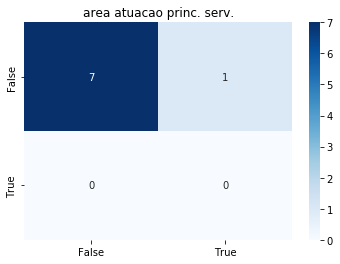

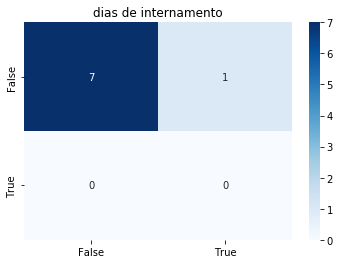

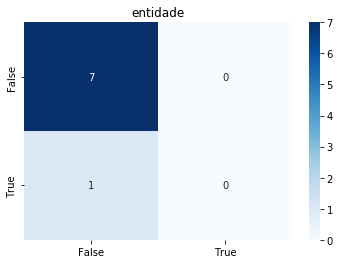

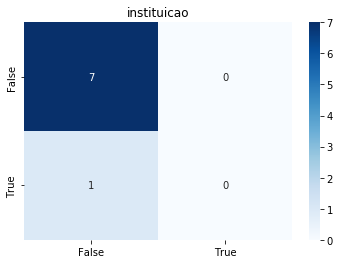

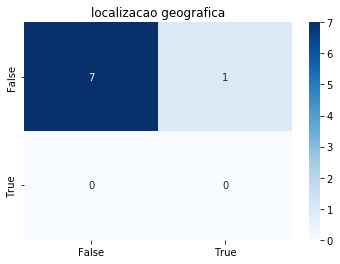

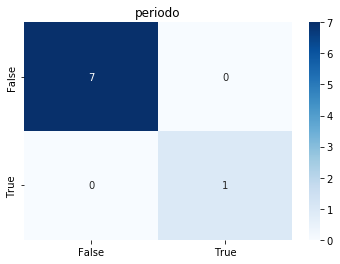

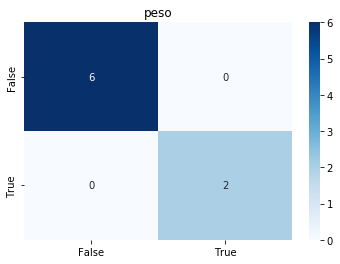

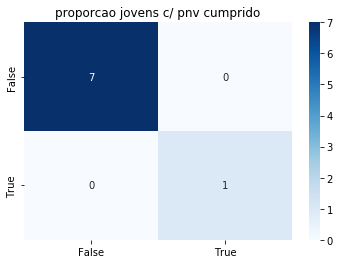

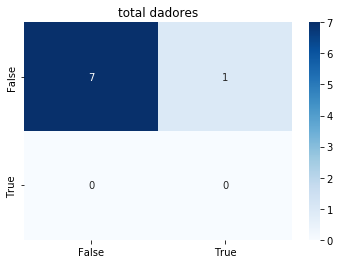

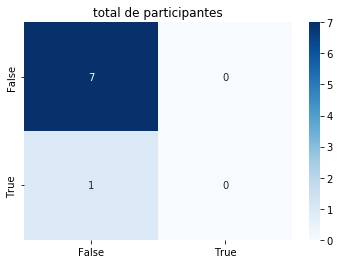

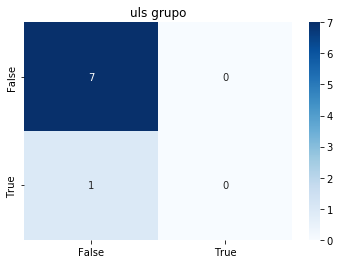

[[76  4]
 [ 4  4]]


In [25]:
array = [[0,0],[0,0]]
for i,l in zip(cf_matrix,labels):
    c = i
    # soma as matrizes de confusões
    array = array + c
    plt.title(l)
    ax= plt.subplot()
    sns.heatmap(i, annot=True, cmap='Blues',fmt='d',ax=ax)
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    
    plt.show()
print(array)


### Inicialização do modelo para testes posteriores

In [26]:
start = datetime.now()
print(f'Started at {start}')

model = SherlockModel();
model.initialize_model_from_json(with_weights=True, model_id="sherlock");

print('Initialized model.')
print(f'Finished at {datetime.now()}, took {datetime.now() - start} seconds')

W0702 12:48:13.652064 10468 deprecation.py:506] From C:\Users\Utilizador\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0702 12:48:13.653030 10468 deprecation.py:506] From C:\Users\Utilizador\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\ops\init_ops.py:97: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0702 12:48:13.657063 10468 deprecation.py:506] From C:\Users\Utilizador\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\ops\init_ops.py:97: calling VarianceScaling._

Started at 2022-07-02 12:48:13.646034
Initialized model.
Finished at 2022-07-02 12:48:14.585066, took 0:00:00.939032 seconds


### Top 3 de previsões

In [28]:
def _proba_to_classes2(y_pred, model_id: str = "sherlock") -> np.array:
    """Get predicted semantic types from prediction vectors.

    Parameters
    ----------
    y_pred
        Nested vector with for each sample a vector of likelihoods per semantic type.
    model_id
        Identifier of model to use.

    Returns
    -------
    y_pred
        Array of Predicted semantic labels.
    """
    arr=[]
    for i in range(0, len(y_pred)):
        y_pred_int = y_pred[i]
        encoder = LabelEncoder()
        encoder.classes_ = np.load(
            f"../sherlock-project/model_files/classes_{model_id}.npy", allow_pickle=True
        )

        y_pred = encoder.inverse_transform(y_pred_int)
        arr.append(y_pred)
    return arr

In [29]:
#funçao que dado um dataframe de features extraction da o top 3 de cada row
def top_3_pred(df: pd.DataFrame):
    n=3
    for i in range(0, df.shape[0]):
        print(f"Row nº {i}")
        a=df.iloc[i:i+1,:]
      
    #n=3
        probs = model.predict_proba(a)
        best_n = np.argsort(probs, axis=1)[:,-n:]
#best_n
#for i in range(0, len(best_n)):  
 #   b= best_n[i]
    #print(best_n[i])
        best_n5=_proba_to_classes2(best_n, model_id)
        for i in range(0, len(best_n5)):  
            b= best_n5[i]
    #for index, value in enumerate(b):
     #   print(f"S1_vec('{index}')<= {value}")
#print(best_n5)
#probs
#best_n5
        ss=[]
        for i, e in reversed(list(enumerate(b))):
               ss.append(e)
#ss 
    
        print("Top 3 de Previsões:")
        for j,i in zip(range(1,4),range(0,3)):
            print(f" {j} -> {ss[i]}") #ss[i]
        print("\n")

In [30]:
#dad_sl= pd.read_parquet("../treino/dados_sinteticos_labels.parquet")
#dad_sl

In [31]:
y_test

array(['dias de internamento', 'peso', 'total de participantes',
       'localizacao geografica', 'uls grupo', 'periodo', 'entidade',
       'periodo'], dtype='<U22')

In [32]:
# vai ver o top 3 de previsoes do nossos dados sinteticos
top_3_pred(X_test)

Row nº 0
Top 3 de Previsões:
 1 -> no doentes inscritos sigic
 2 -> ddd consumidas
 3 -> proporcao jovens c/ pnv cumprido


Row nº 1
Top 3 de Previsões:
 1 -> peso
 2 -> rt
 3 -> proporcao jovens c/ pnv cumprido


Row nº 2
Top 3 de Previsões:
 1 -> total dadores
 2 -> milhoes de habitantes
 3 -> virus da gripe


Row nº 3
Top 3 de Previsões:
 1 -> localizacao geografica
 2 -> vacinas
 3 -> proporcao jovens c/ pnv cumprido


Row nº 4
Top 3 de Previsões:
 1 -> consultas dos test. vit.
 2 -> grupo hospitalar
 3 -> local de trabalho


Row nº 5
Top 3 de Previsões:
 1 -> periodo
 2 -> cod. mes ini.
 3 -> centro custo


Row nº 6
Top 3 de Previsões:
 1 -> entidade
 2 -> hospital
 3 -> centro custo


Row nº 7
Top 3 de Previsões:
 1 -> periodo
 2 -> total dadores
 3 -> virus da gripe




### Previsão das nossas labels de teste

In [34]:

predicted_labels = model.predict(X_test, "sherlock2.2")

predicted_labels 

array(['no doentes inscritos sigic', 'peso', 'total dadores',
       'localizacao geografica', 'consultas dos test. vit.', 'periodo',
       'entidade', 'periodo'], dtype='<U61')